Visualization notebook where 2D parameter space slices can be viewed and qualitatively different initial conditions identified

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.axes as axes
import matplotlib.markers as mark

Note: I will want to first do a course search through wide section of slice, then finer data collection only around regions of interest. This is why resolution is modulatable.

In [46]:
par1 = 'theta1'
par2 = 'theta2'

par1_min = 2
par1_max = 3
par2_min = -6.5
par2_max = -5.5
par1_step = .01
par2_step = .01

par1_res = np.arange(par1_min,par1_max+.0001,par1_step)
par2_res = np.arange(par2_min,par2_max+.0001,par2_step)

Create a function which returns the parameter values put in for a point 

In [54]:
#Previous theta1 theta2 slice, not wide enough 
fitnessdata = np.loadtxt('slicetheta1theta2.dat')
print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater(fitnessdata, 0.15)
Z_Static = Z_Static.filled(0)
print(Z_Static)
Z_Disorder = np.ma.masked_less_equal(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
Z_Disorder = Z_Disorder.filled(0)
print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)

(array([], dtype=int64), array([], dtype=int64))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


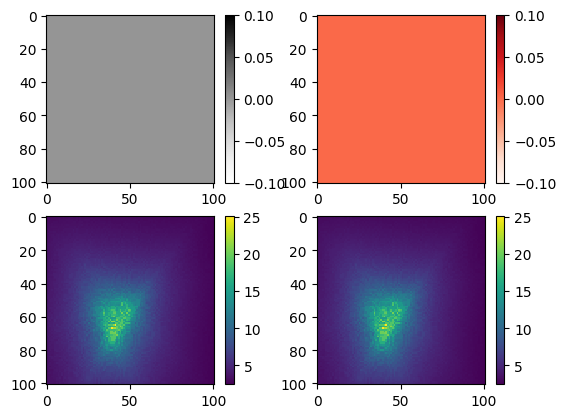

In [55]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
pos1 = ax1.imshow(Z_Static, cmap='Greys', interpolation='none')
fig.colorbar(pos1,ax=ax1)
pos2 = ax2.imshow(Z_Disorder, cmap='Reds', interpolation='none')
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.imshow(Z_Pyloric, cmap='viridis', interpolation='none')
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.imshow(fitnessdata, cmap='viridis', interpolation='none')
fig.colorbar(pos4,ax=ax4)

In [3]:
par1 = 'theta1'
par2 = 'theta3'

par1_min = 0
par1_max = 5
par2_min = -9
par2_max = 0
par1_step = .01
par2_step = .01

par1_res = np.arange(par1_min,par1_max+.0001,par1_step)
par2_res = np.arange(par2_min,par2_max+.0001,par2_step)

In [4]:
#Theta1 Theta 3 slice with expanded area
# fitnessdata = np.loadtxt('slicetheta1theta3.dat').T
fitnessdata = np.loadtxt('slice.dat').T
# print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater_equal(fitnessdata, 0.15)
# Z_Static = Z_Static.filled(0.3)
Z_Disorder = np.ma.masked_less(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
# Z_Disorder = Z_Disorder.filled(0)
print(np.where(Z_Disorder==.3))
# print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)

(array([], dtype=int64), array([], dtype=int64))


In [7]:
red = np.loadtxt('redparamtrack.dat')
orange = np.loadtxt('orangeparamtrack.dat')
yellow = np.loadtxt('yellowparamtrack.dat')
green = np.loadtxt('greenparamtrack.dat')
blue = np.loadtxt('blueparamtrack.dat')
purple = np.loadtxt('purpleparamtrack.dat')
print(len(red))

100001


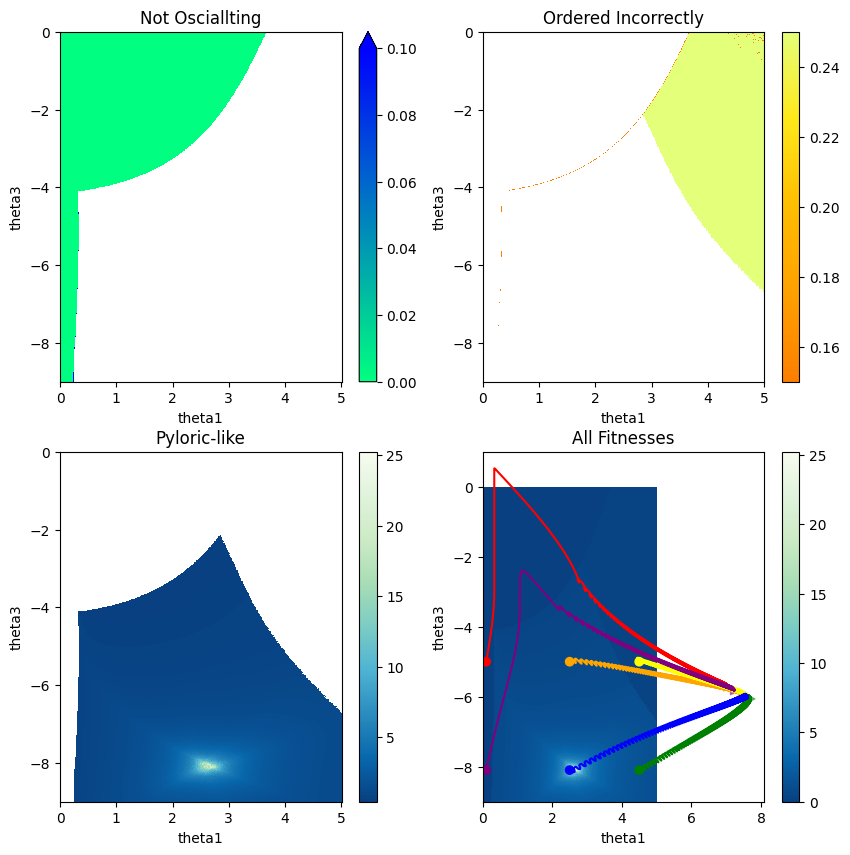

In [8]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
# ax1.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax1.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
# ax2.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax2.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
# ax3.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax3.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
# ax4.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax4.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos4,ax=ax4)
ax1.set_title("Not Osciallting")
ax2.set_title("Ordered Incorrectly")
ax3.set_title("Pyloric-like")
ax4.set_title("All Fitnesses")
ax1.set_xlabel(par1)
ax1.set_ylabel(par2)
ax2.set_xlabel(par1)
ax2.set_ylabel(par2)
ax3.set_xlabel(par1)
ax3.set_ylabel(par2)
ax4.set_xlabel(par1)
ax4.set_ylabel(par2)
ax4.plot(red[:,0],red[:,1],color='r')
ax4.plot(orange[:,0],orange[:,1],color='orange')
ax4.plot(yellow[:,0],yellow[:,1],color='yellow')
ax4.plot(green[:,0],green[:,1],color='green')
ax4.plot(blue[:,0],blue[:,1],color='blue')
ax4.plot(purple[:,0],purple[:,1],color='purple')
ax4.scatter([red[-1,0],orange[-1,0],yellow[-1,0],green[-1,0],blue[-1,0],purple[-1,0]],[red[-1,1],orange[-1,1],yellow[-1,1],green[-1,1],blue[-1,1],purple[-1,1]],c=['r','orange','yellow','green','blue','purple'],marker=mark.MarkerStyle(">", "full"),alpha=.5)
ax4.scatter([red[0,0],orange[0,0],yellow[0,0],green[0,0],blue[0,0],purple[0,0]],[red[0,1],orange[0,1],yellow[0,1],green[0,1],blue[0,1],purple[0,1]],c=['r','orange','yellow','green','blue','purple'])
plt.show()